# Modelo de regresión

### Variable objetivo: nota final

In [1]:
# Importación de librerías:
# Data processing
import pandas as pd
import numpy as np

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Model salection and evaluation
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


### Carga de datos

In [2]:
df = pd.read_csv('./datos_transformados/df_regression.csv', index_col=0)
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nota_final,aprobado,nivel_dificultad_Difícil,nivel_dificultad_Fácil,nivel_dificultad_Medio,...,tiene_tutor_Sí,horario_estudio_preferido_Mañana,horario_estudio_preferido_Noche,horario_estudio_preferido_Tarde,horario_estudio_preferido_Unknown,estilo_aprendizaje_Auditivo,estilo_aprendizaje_Kinestésico,estilo_aprendizaje_Lectura/Escritura,estilo_aprendizaje_Unknown,estilo_aprendizaje_Visual
0,0.331561,0.269009,0.833002,0.445949,0.636364,84.4,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.418439,0.726082,0.793121,0.102807,0.000000,72.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.146282,0.862624,0.682795,0.625874,0.636364,80.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.235301,0.741118,0.785623,0.765471,0.454545,78.2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.517917,0.431749,0.445307,0.272727,66.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Separación del conjunto de datos

In [3]:
# Variable objetivo
tv = 'nota_final'

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[tv]) # Características
y = df[tv] # Etiqueta o resultado

# Dividimos los datos de entrenamiento en 80% y 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 20)
Tamaño del conjunto de prueba: (200, 20)


### Entrenamiento del modelo

In [4]:
# Crear el modelo de regresión lineal
modelo = LinearRegression() # n_jobs para elegir si entrenemos el modelo con más hilos, n_jobs=-1 para utilizar todos

# Ajustar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

In [5]:
y_pred.round(2)

array([77.16, 77.83, 55.71, 72.84, 76.04, 82.96, 71.36, 73.05, 77.93,
       67.78, 72.82, 74.75, 54.11, 80.28, 71.06, 66.92, 77.39, 66.14,
       72.16, 75.7 , 72.34, 73.42, 78.48, 68.21, 75.74, 73.01, 71.14,
       68.14, 76.54, 55.19, 74.58, 73.32, 69.33, 67.23, 78.62, 68.85,
       55.54, 76.68, 71.54, 78.55, 70.85, 71.49, 73.63, 45.86, 53.28,
       71.97, 76.32, 79.77, 77.81, 72.58, 76.82, 78.73, 75.83, 72.18,
       72.81, 72.64, 70.9 , 72.79, 79.29, 78.42, 69.17, 65.96, 77.81,
       68.52, 52.4 , 66.27, 75.14, 68.9 , 71.28, 81.68, 59.24, 69.73,
       65.58, 70.38, 72.43, 75.66, 74.33, 68.55, 75.21, 75.71, 76.5 ,
       72.73, 76.18, 71.28, 73.61, 67.36, 82.79, 73.39, 72.15, 72.89,
       62.28, 71.55, 57.92, 72.43, 70.69, 69.54, 74.12, 69.38, 73.79,
       73.09, 67.7 , 68.82, 72.28, 71.49, 75.78, 77.53, 72.08, 77.1 ,
       73.74, 65.47, 61.86, 72.03, 75.01, 70.7 , 77.46, 81.31, 55.14,
       74.37, 75.19, 66.8 , 69.81, 69.14, 74.39, 76.43, 66.45, 77.74,
       65.41, 67.31,

## Validación del modelo
#### Comparación con scatterplot

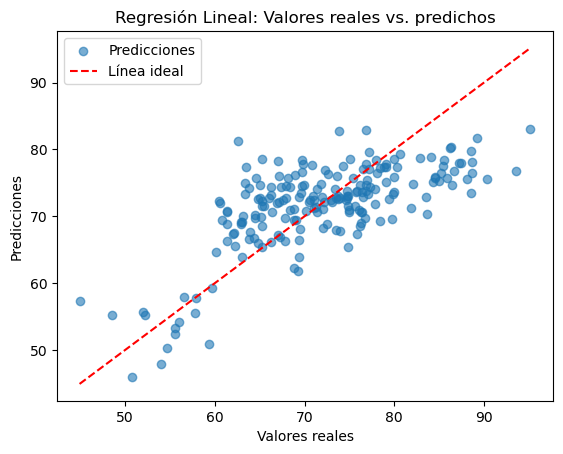

In [6]:
# Graficar valores reales vs. predichos
plt.scatter(y_test, y_pred, label="Predicciones", alpha=0.6)

# Agregar línea de referencia (y = x)
min_val = min(y_test.min(), y_pred.min()) # Valor mínimo entre reales y predichos
max_val = max(y_test.max(), y_pred.max()) # Valor máximo entre reales y predichos
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Línea ideal")

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. predichos")
plt.legend()
plt.show()

## Comparación de distribuciones

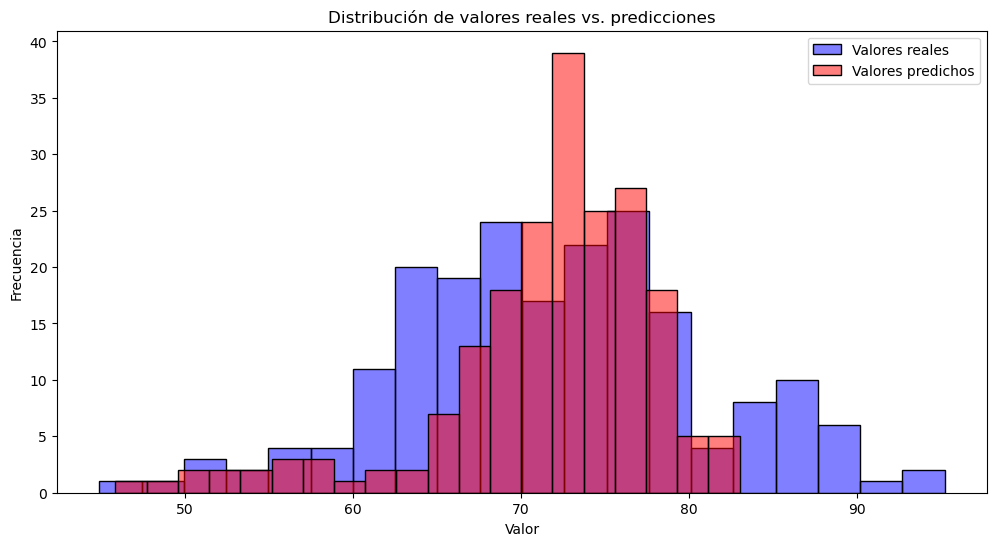

In [7]:
# Graficar valores reales vs. predichos
plt.figure(figsize=(12,6))

n_bins = 20

# Histograma de y_test (azul)
sns.histplot(y_test, bins=n_bins, edgecolor='black', color='blue', alpha=0.5, label='Valores reales')

# Histograma de y_pred (rojo)
sns.histplot(y_pred, bins=n_bins, edgecolor='black', color='red', alpha=0.5, label='Valores predichos')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores reales vs. predicciones')
plt.legend()
plt.show()

## Residuos

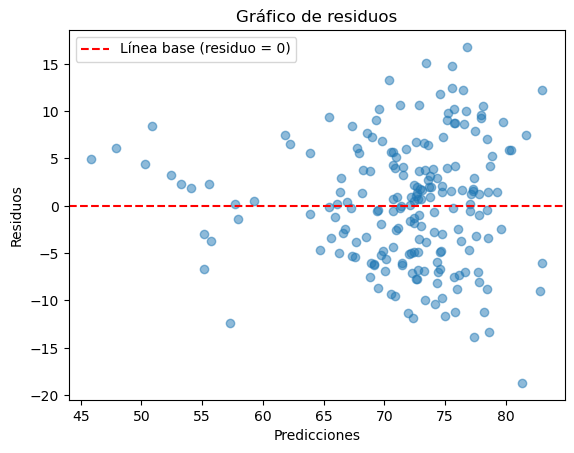

In [8]:
# Calcular los resuduos
residuos = y_test - y_pred

# Graficar residuos
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label="Línea base (residuo = 0)")

# Etiquetas y título
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.legend()
plt.show()

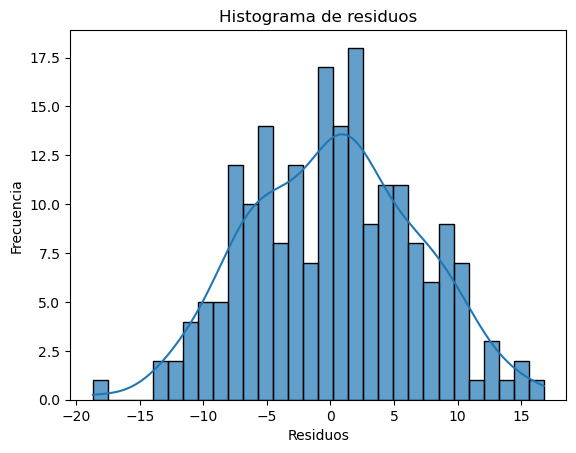

In [9]:
# Graficar histograma de los residuos
sns.histplot(residuos, bins=30, kde=True, edgecolor="black", alpha=0.7)

# etiquetas y título
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos")

# Mostrar gráfico
plt.show()

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Importancia de las características

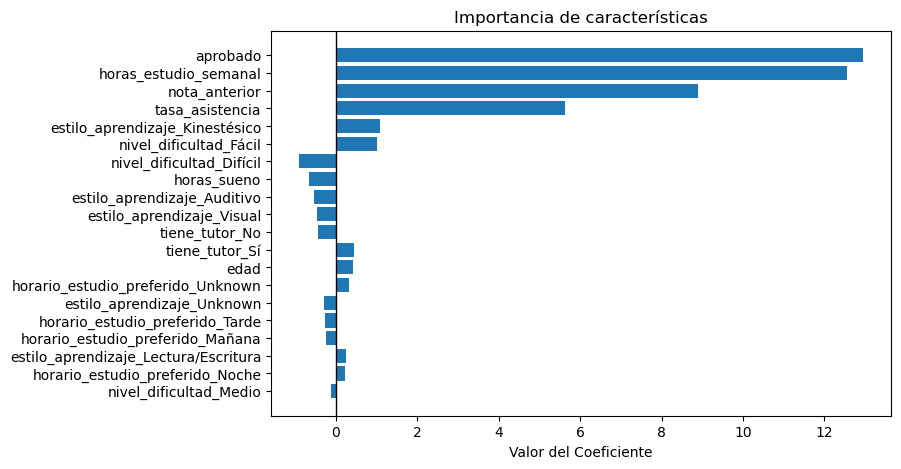

In [10]:
# Crear DataFrame con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': modelo.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs) # Ordenar por magnitud

# Visualizar los coeficientes en un gráfico de barras
plt.figure(figsize=(8,5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Valor del Coeficiente')
plt.title('Importancia de características')
plt.axvline(0, color='black', linewidth=1)
plt.show()

In [11]:
coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

,Feature,Coefficient
5,aprobado,12.953258
0,horas_estudio_semanal,12.559004
1,nota_anterior,8.887062
2,tasa_asistencia,5.639503
16,estilo_aprendizaje_Kinestésico,1.090742
7,nivel_dificultad_Fácil,1.010805
6,nivel_dificultad_Difícil,-0.899366
3,horas_sueno,-0.673548
15,estilo_aprendizaje_Auditivo,-0.541050
19,estilo_aprendizaje_Visual,-0.478831


# Métricas

In [12]:
# Predicciones
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [13]:
# cálculo de métricas
metrics = {
    "train": {
        "R2": r2_score(y_train, y_train_pred),
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "RSME": np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    "test": {
        "R2": r2_score(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "RSME": np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
}

# Mostrar métricas en un DataFrame
df_metrics = pd.DataFrame(metrics).T

df_metrics.round(2)

,R2,MAE,RSME
train,0.54,5.26,6.57
test,0.48,5.27,6.50


parece un modelo aceptable pero con margen de mejora. 
El principal problema no es el overfitting (sobreajuste), 
sino el underfitting (subajuste) y la baja capacidad predictiva general del modelo.

In [14]:
y.mean()

np.float64(71.44139999999999)

In [15]:
y.median()

71.4

# Entrenamiento final

In [16]:
import joblib

# Entrenar el modelo con todo el conjunto de datos
model_final = LinearRegression()
model_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(model_final, './modelos/modelo_regresion.pkl')

['./modelos/modelo_regresion.pkl']

# Vamos a probar modelos con regularización

In [17]:
# Importamos los modelos
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Definimos los modelos con regularización
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Inicializar diccionario para métricas
metrics_result = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train) # Entrenar el modelo
    
    # Predecir en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular métricas
    metrics_result[name] = {
        "Train R2": r2_score(y_train, y_train_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test R2": r2_score(y_test, y_test_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    }
    
    # Convertir en DataFrame
    df_metrics = pd.DataFrame(metrics_result).T

In [18]:
df_metrics.round(2)

,Train R2,Train MAE,Train RMSE,Test R2,Test MAE,Test RMSE
Linear,0.54,5.26,6.57,0.48,5.27,6.50
Ridge,0.54,5.26,6.57,0.48,5.26,6.49
Lasso,0.53,5.29,6.62,0.49,5.27,6.45
ElasticNet,0.48,5.62,6.98,0.45,5.44,6.73
